In [56]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# read in data
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#counts for whether coin trades or not
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [8]:
str_cols = []

for col in df.columns:
    if (df[col].dtype == object) & (col != "HeartDisease"):
        print(col)
        str_cols.append(col)
        
df_str = df.loc[:, str_cols]
df_str.head()

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [9]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64

AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64

DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64

Sex
Female    167805
Male      151990
Name: Sex, dtype: int64

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

Diabetic
No                         269653
Yes              

In [16]:
df_str_label = df_str.copy()

In [20]:
df_str_label.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df_str_label = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
df_str_label.head()

In [21]:
#categorial
le = LabelEncoder()
col1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]
for i in col1:
  df_str_label[i] = le.fit_transform(df_str_label[i])
df_str_label.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,0,55-59,White,Yes,1,Very good,1,0,1
1,0,0,1,0,0,80 or older,White,No,1,Very good,0,0,0
2,1,0,0,0,1,65-69,White,Yes,1,Fair,1,0,0
3,0,0,0,0,0,75-79,White,No,0,Good,0,0,1
4,0,0,0,1,0,40-44,White,No,1,Very good,0,0,0


In [22]:
df1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [23]:
df_str_dum = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
df_str_dum.head()

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [24]:
df_str1 = pd.concat([df1, df_str_dum], axis=1)

In [26]:
df_str1.head(5)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [27]:
num_cols = []

for col in df.columns:
    if (df[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols.append(col)
        
df_num = df.loc[:, num_cols]
df_num.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [28]:
df_num.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [32]:
df_no_scale = df_num.copy()

In [33]:
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776


In [35]:
# scale training set
df_train_scale = pd.concat([df_scale, df_str1], axis=1)
df_train_scale["HeartDisease"] = df.HeartDisease

df_train_scale["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_train_scale.HeartDisease]
df_train_scale.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,-1.844750,-0.046751,3.281069,-1.460354,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,-0.274603,2.091388,3.281069,0.628776,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [36]:
corrs = abs(df_train_scale.corr())["HeartDisease"].sort_values(ascending=False)
corrs

HeartDisease                           1.000000
DiffWalking                            0.201258
Stroke                                 0.196835
Diabetic_Yes                           0.183072
GenHealth_Poor                         0.174662
Diabetic_No                            0.170977
PhysicalHealth                         0.170721
GenHealth_Fair                         0.147954
KidneyDisease                          0.145197
AgeCategory_80 or older                0.143041
GenHealth_Excellent                    0.116042
Smoking                                0.107764
GenHealth_Very good                    0.101886
PhysicalActivity                       0.100030
AgeCategory_75-79                      0.098690
SkinCancer                             0.093317
AgeCategory_70-74                      0.082578
AgeCategory_18-24                      0.075385
Sex                                    0.070040
AgeCategory_35-39                      0.066685
AgeCategory_25-29                      0

In [52]:
# get features and target
X = df_train_scale.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y = df_train_scale["HeartDisease"].values

In [53]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499992182491909
0.2500007817508091


In [57]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

C:\Users\yvargas\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219418
           1       0.55      0.11      0.18     20428

    accuracy                           0.92    239846
   macro avg       0.74      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

[[217585   1833]
 [ 18189   2239]]

Testing SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.53      0.10      0.17      6945

    accuracy                           0.91     79949
   macro avg       0.73      0.55      0.56     79949
weighted avg       0.89      0.91      0.89     79949

[[72396   608]
 [ 6251   694]]


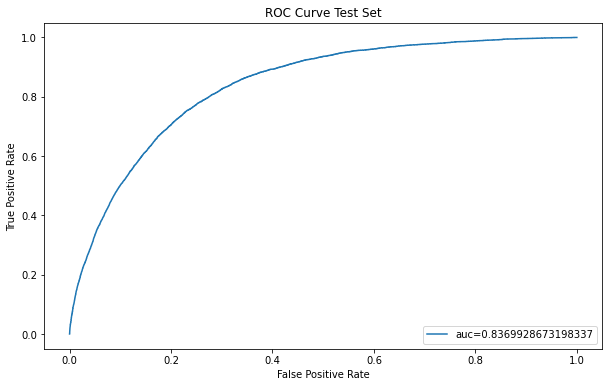

In [58]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    219418
           1       0.72      0.14      0.24     20428

    accuracy                           0.92    239846
   macro avg       0.82      0.57      0.60    239846
weighted avg       0.91      0.92      0.90    239846

[[218281   1137]
 [ 17468   2960]]

Testing SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.52      0.10      0.17      6945

    accuracy                           0.91     79949
   macro avg       0.72      0.54      0.56     79949
weighted avg       0.89      0.91      0.89     79949

[[72376   628]
 [ 6262   683]]


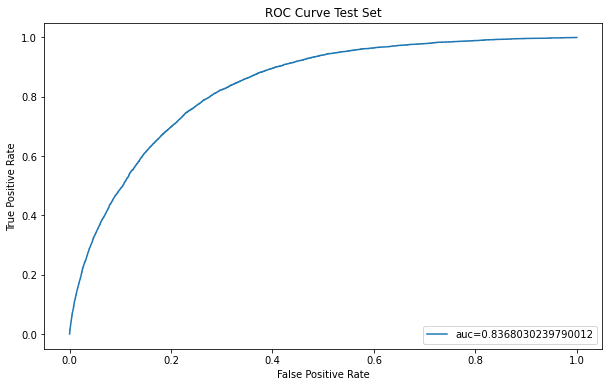

In [60]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    219418
           1       0.64      0.09      0.16     20428

    accuracy                           0.92    239846
   macro avg       0.78      0.54      0.56    239846
weighted avg       0.90      0.92      0.89    239846

[[218391   1027]
 [ 18589   1839]]

Testing SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73004
           1       0.57      0.08      0.13      6945

    accuracy                           0.91     79949
   macro avg       0.75      0.54      0.54     79949
weighted avg       0.89      0.91      0.88     79949

[[72611   393]
 [ 6419   526]]


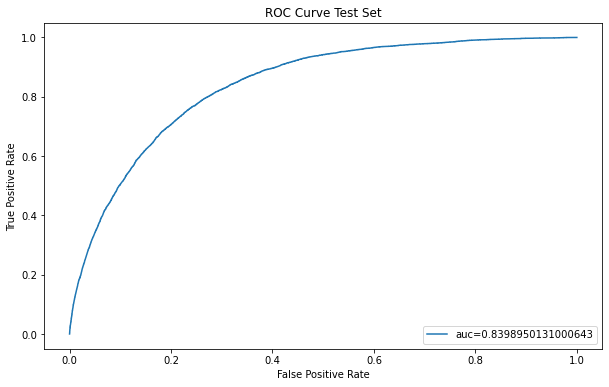

In [63]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219418
           1       0.54      0.12      0.20     20428

    accuracy                           0.92    239846
   macro avg       0.73      0.56      0.58    239846
weighted avg       0.89      0.92      0.89    239846

[[217277   2141]
 [ 17925   2503]]

Testing SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.53      0.11      0.19      6945

    accuracy                           0.91     79949
   macro avg       0.72      0.55      0.57     79949
weighted avg       0.89      0.91      0.89     79949

[[72297   707]
 [ 6163   782]]


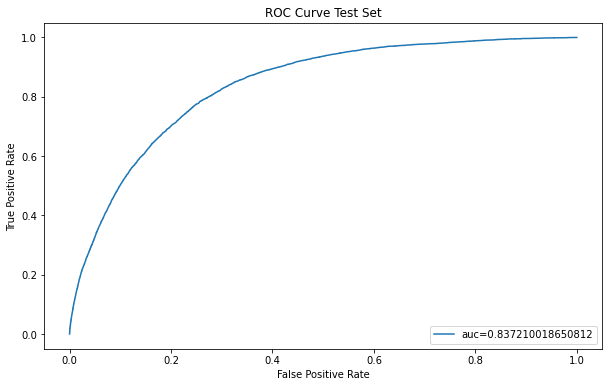

In [64]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219418
           1       1.00      0.97      0.98     20428

    accuracy                           1.00    239846
   macro avg       1.00      0.98      0.99    239846
weighted avg       1.00      1.00      1.00    239846

[[219333     85]
 [   647  19781]]

Testing SET
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73004
           1       0.34      0.12      0.18      6945

    accuracy                           0.90     79949
   macro avg       0.63      0.55      0.56     79949
weighted avg       0.87      0.90      0.88     79949

[[71394  1610]
 [ 6101   844]]


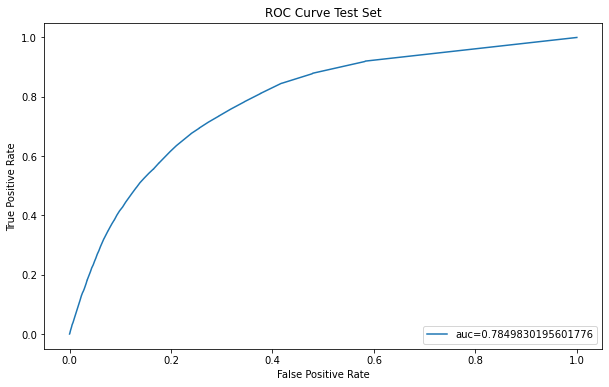

In [65]:
randomForest = RandomForestClassifier(random_state=42)
randomForest = evaluateModel(randomForest, X_train, y_train, X_test, y_test)

In [ ]:
#first Machine Learning attempt determined that Random Forest 
#is our best model to determine if a patient has heart disease or not